In [1]:
from collections import defaultdict, OrderedDict
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

def get_out_degree_counts(filename):
    degrees = defaultdict(int)
    
    f = open(filename, 'r')
    for line in f.readlines():
        if line.startswith('#'):
            continue
        edge_info = line.split(' ')
        node_from = max(int(edge_info[0]), int(edge_info[1]))
        degrees[node_from] += 1

    return degrees

def get_out_degree_distribution(degrees):
    out_degree_distribution = defaultdict(int)
    for node in degrees.keys():
        out_degree = degrees[node]
        out_degree_distribution[out_degree] += 1
    out_degree_distribution_ordered = OrderedDict(sorted(out_degree_distribution.items()))
    return out_degree_distribution_ordered

def visualize_out_degree_distribution(degrees, frequencies, reg):
    np_deg = np.array(degrees).reshape(-1, 1)
    prediction = reg.predict(np_deg)

    print(reg.coef_, reg.intercept_)
    _, ax = plt.subplots()
    ax.scatter(degrees, frequencies)
    ax.plot(degrees, prediction)

def write_out_degree_distribution(degrees, frequencies, linreg, filename):
    np_deg = np.array(degrees).reshape(-1, 1)
    predictions = linreg.predict(np_deg)
    with open(f'out_deg_{filename}', "w") as f:
        f.write("lnt\tlnb\tlinreg\t k=" + str(linreg.coef_) + ", b=" + str(linreg.intercept_) + "\n")

        for i in range(len(degrees)):
            f.write(str(degrees[i]) + "\t" + str(int(frequencies[i])) + "\t" + str(predictions[i]) + "\n")

def map_log(collection, base):
    return list(map(lambda x: math.log(x, 10), collection))

def train_linreg(x_list, y_list):
    np_x_list = np.array(x_list).reshape(-1, 1)
    np_y_list = np.array(y_list)
    return LinearRegression().fit(np_x_list, np_y_list)

def get_and_visualize_out_degree_distribution(filename):
    degrees = get_out_degree_counts(filename)
    out_degree_distribution = get_out_degree_distribution(degrees)
    if True:
        degrees, frequencies = log_binning(out_degree_distribution, min(len(degrees) // 2, 20))
        log_degrees, log_frequencies = map_log(degrees, 10), map_log(frequencies, 10)
        linreg = train_linreg(log_degrees, log_frequencies)
        write_out_degree_distribution(log_degrees, log_frequencies, linreg, filename)
        visualize_out_degree_distribution(log_degrees, log_frequencies, linreg)
    else:
        visualize_out_degree_distribution(list(out_degree_distribution.keys()), list(out_degree_distribution.values()))

def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = math.log(max(counter_dict.keys()), 10)
    max_y = math.log(max(counter_dict.values()), 10)
    max_base = max([max_x,max_y])

    min_x = math.log(min(drop_zeros(counter_dict.keys())), 10)

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
    bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])

    bin_means_x = list(filter(lambda x: not np.isnan(x), bin_means_x))
    bin_means_y = list(filter(lambda x: not np.isnan(x), bin_means_y))

    return bin_means_x,bin_means_y
    

[-1.18329466] 0.9999999999999999


C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:80: RuntimeWarning: invalid value encountered in divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:81: RuntimeWarning: invalid value encountered in divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


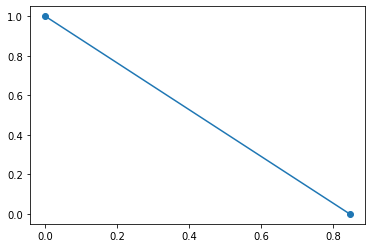

In [2]:
get_and_visualize_out_degree_distribution("test.txt")

[-2.04702512] 5.395583311652679


C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:80: RuntimeWarning: invalid value encountered in divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:81: RuntimeWarning: invalid value encountered in divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


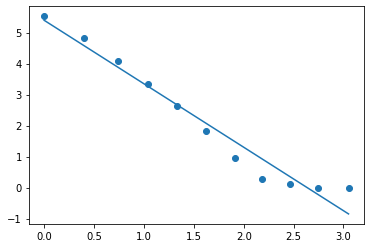

In [3]:
get_and_visualize_out_degree_distribution("ia-stackexch-user-marks-post-und-sorted.edges")

[-1.29257484] 4.333580206076875


C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:80: RuntimeWarning: invalid value encountered in divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:81: RuntimeWarning: invalid value encountered in divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


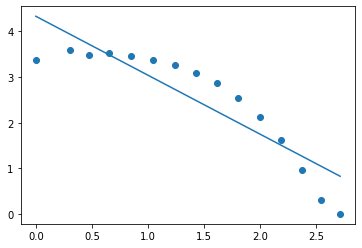

In [4]:
get_and_visualize_out_degree_distribution("ia-yahoo-messages-sorted.mtx")

[-2.07857822] 6.0876872860330415


C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:80: RuntimeWarning: invalid value encountered in divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:81: RuntimeWarning: invalid value encountered in divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


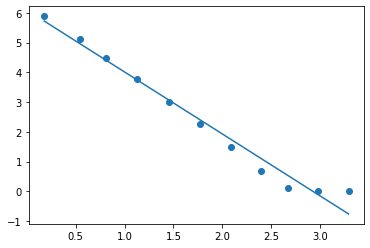

In [5]:
get_and_visualize_out_degree_distribution("rec-amazon-ratings-sorted.edges")

[-1.56037686] 4.677199096800651


C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:80: RuntimeWarning: invalid value encountered in divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
C:\Users\alexp\AppData\Local\Temp\ipykernel_6108\2902636363.py:81: RuntimeWarning: invalid value encountered in divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


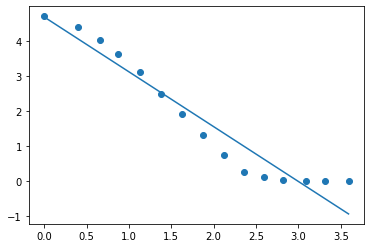

In [6]:
get_and_visualize_out_degree_distribution("sx-askubuntu-sorted.txt")

[-1.22547469] 3.743473568651271


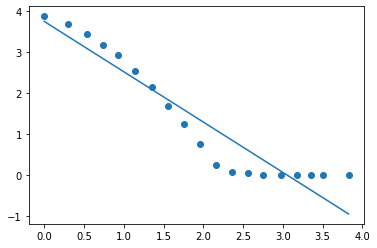

In [7]:
get_and_visualize_out_degree_distribution("musae_git_edges.txt")

In [8]:
import os
os.getcwd()

'c:\\Users\\alexp\\Documents\\Studies\\network-analysis\\calc_network_distribution'